In [5]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline

# read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)


In [6]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [8]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

from datetime import datetime

In [9]:
!pip install missingno

In [10]:
import missingno as msno

**Exploratory Analysis**

In [11]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [12]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
reward        10 non-null int64
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
offer_type    10 non-null object
id            10 non-null object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [13]:
portfolio.shape

(10, 6)

In [14]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')


In [15]:
def encode_channels():
    channels = []
    for lst in portfolio['channels']:
        for channel in lst:
            if channel not in channels:
                channels.append(channel)
    
    # one-hot encode channel
    for channel in channels:
        portfolio['channel_' + channel] = portfolio['channels'].apply(lambda x: 1 if channel in x else 0)
    
    # drop channels column
    portfolio.drop(['channels'], axis=1, inplace=True)

In [16]:
encode_channels()
portfolio.head()

,reward,difficulty,duration,offer_type,id,channel_email,channel_mobile,channel_social,channel_web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [17]:
print("Available Offers: \n\n")
for i in range(portfolio.shape[0]):
    row = portfolio.iloc[i]
    print("{}: Difficulty: {}, Duration: {}, Reward: {} ".format(row['offer_type'], row['difficulty'], row['duration'], row['reward']))

Available Offers: 


bogo: Difficulty: 10, Duration: 7, Reward: 10 
bogo: Difficulty: 10, Duration: 5, Reward: 10 
informational: Difficulty: 0, Duration: 4, Reward: 0 
bogo: Difficulty: 5, Duration: 7, Reward: 5 
discount: Difficulty: 20, Duration: 10, Reward: 5 
discount: Difficulty: 7, Duration: 7, Reward: 3 
discount: Difficulty: 10, Duration: 10, Reward: 2 
informational: Difficulty: 0, Duration: 3, Reward: 0 
bogo: Difficulty: 5, Duration: 5, Reward: 5 
discount: Difficulty: 10, Duration: 7, Reward: 2 


In [18]:
portfolio.rename(columns = {'id':'offer_id'}, inplace = True)
portfolio.head()

,reward,difficulty,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [19]:
portfolio_offers = {}

for i in range(portfolio.shape[0]):
    row = portfolio.iloc[i]
    portfolio_offers[row['offer_id']] = row['offer_type'].upper() + '/C' + str(row['difficulty']) + '/R' + str(row['reward']) + '/T' + str(row['duration'])

portfolio_offers

{'ae264e3637204a6fb9bb56bc8210ddfd': 'BOGO/C10/R10/T7',
 '4d5c57ea9a6940dd891ad53e9dbe8da0': 'BOGO/C10/R10/T5',
 '3f207df678b143eea3cee63160fa8bed': 'INFORMATIONAL/C0/R0/T4',
 '9b98b8c7a33c4b65b9aebfe6a799e6d9': 'BOGO/C5/R5/T7',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7': 'DISCOUNT/C20/R5/T10',
 '2298d6c36e964ae4a3e7e9706d1fb8c2': 'DISCOUNT/C7/R3/T7',
 'fafdcd668e3743c1bb461111dcafc2a4': 'DISCOUNT/C10/R2/T10',
 '5a8bc65990b245e5a138643cd4eb9837': 'INFORMATIONAL/C0/R0/T3',
 'f19421c1d4aa40978ebb69ca19b0e20d': 'BOGO/C5/R5/T5',
 '2906b810c7d4411798c6938adc9daaa5': 'DISCOUNT/C10/R2/T7'}

In [20]:
portfolio['offer_id'] = portfolio['offer_id'].apply(lambda x: portfolio_offers[x])

In [21]:
portfolio.head()

,reward,difficulty,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web
0,10,10,7,bogo,BOGO/C10/R10/T7,1,1,1,0
1,10,10,5,bogo,BOGO/C10/R10/T5,1,1,1,1
2,0,0,4,informational,INFORMATIONAL/C0/R0/T4,1,1,0,1
3,5,5,7,bogo,BOGO/C5/R5/T7,1,1,0,1
4,5,20,10,discount,DISCOUNT/C20/R5/T10,1,0,0,1


In [22]:
available_offers = list(portfolio['offer_type'].value_counts().keys())
available_offers

['bogo', 'discount', 'informational']

In [23]:
def encode_offer_type():
    offer_types = []
    # one-hot encode offers
    for offer in range(len(available_offers)):
        portfolio['offer_' + available_offers[offer]] = \
            portfolio['offer_type'].apply(lambda x: 1 if x == available_offers[offer] else 0)
    
    # drop offer_type column
    portfolio.drop(['offer_type'], axis=1, inplace=True)

encode_offer_type()

In [24]:
portfolio.head()

,reward,difficulty,duration,offer_id,channel_email,channel_mobile,channel_social,channel_web,offer_bogo,offer_discount,offer_informational
0,10,10,7,BOGO/C10/R10/T7,1,1,1,0,1,0,0
1,10,10,5,BOGO/C10/R10/T5,1,1,1,1,1,0,0
2,0,0,4,INFORMATIONAL/C0/R0/T4,1,1,0,1,0,0,1
3,5,5,7,BOGO/C5/R5/T7,1,1,0,1,1,0,0
4,5,20,10,DISCOUNT/C20/R5/T10,1,0,0,1,0,1,0


In [25]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [26]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
gender              14825 non-null object
age                 17000 non-null int64
id                  17000 non-null object
became_member_on    17000 non-null int64
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [27]:
profile.shape

(17000, 5)

In [28]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [29]:
profile[profile['age'] == 118].count()

gender                 0
age                 2175
id                  2175
became_member_on    2175
income                 0
dtype: int64

In [30]:
profile['age'] = profile['age'].apply(lambda x: np.nan if x == 118 else x)
profile.head()

,gender,age,id,became_member_on,income
0,None,NaN,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,NaN,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,NaN,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


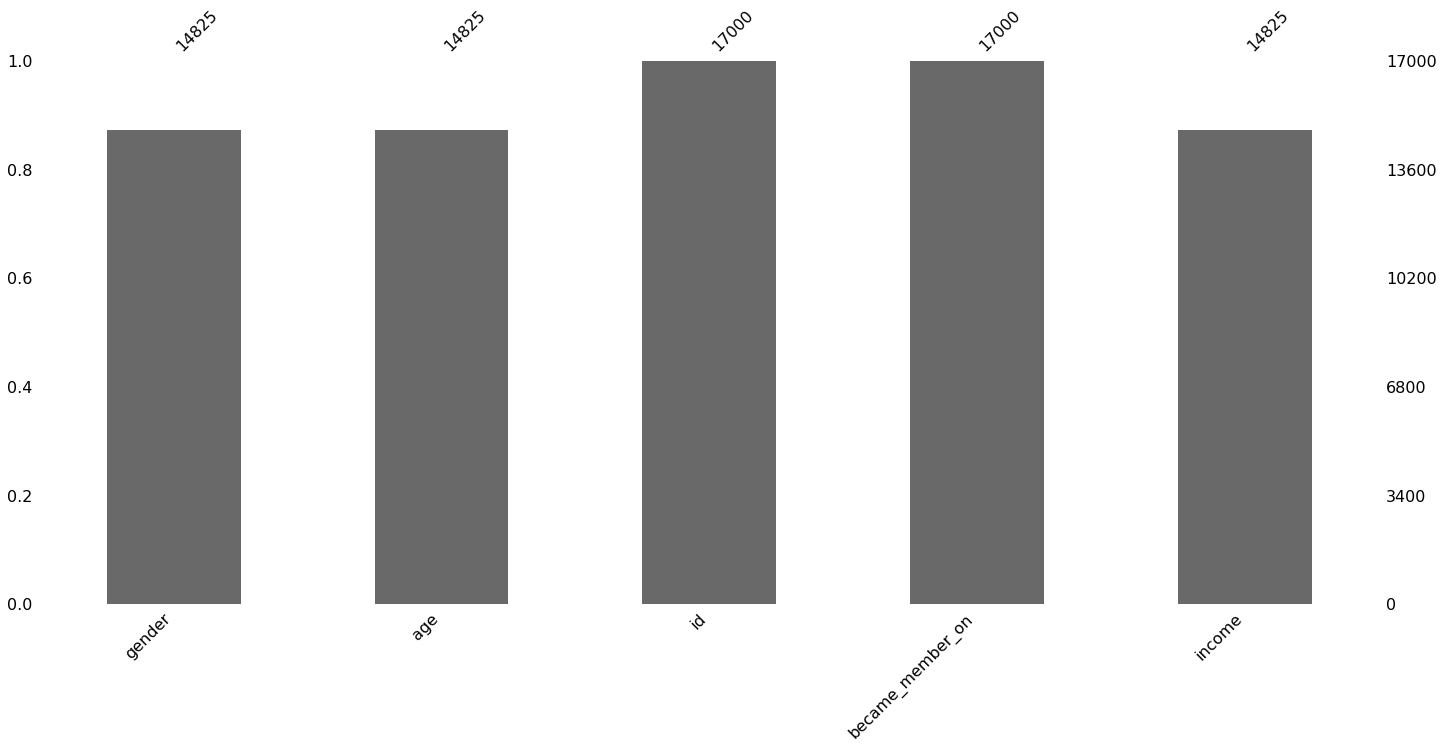

In [31]:
msno.bar(profile)

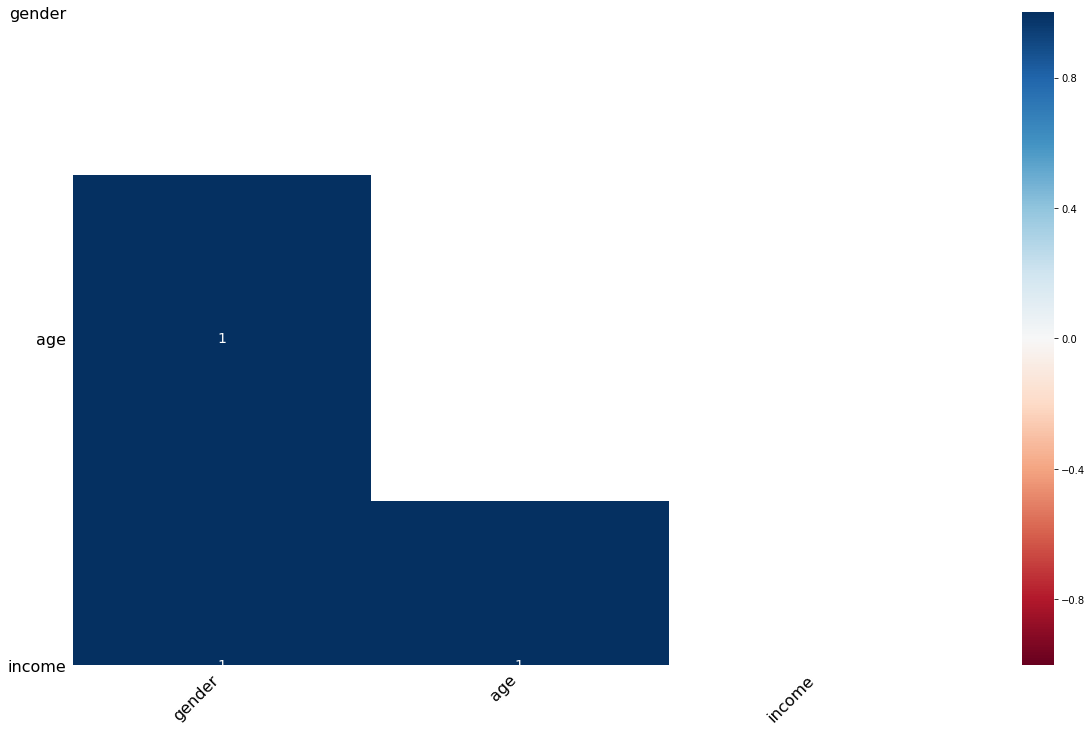

In [32]:
msno.heatmap(profile)

In [34]:
profile = profile[profile['age'].isnull() == False]

In [35]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
gender              14825 non-null object
age                 14825 non-null float64
id                  14825 non-null object
became_member_on    14825 non-null int64
income              14825 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 694.9+ KB


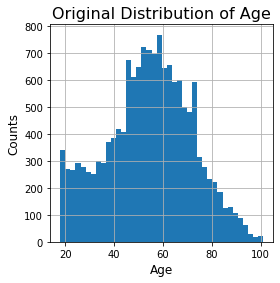

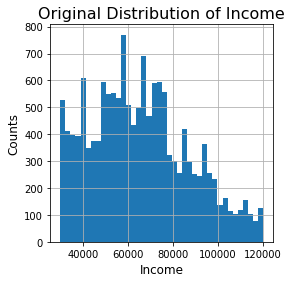

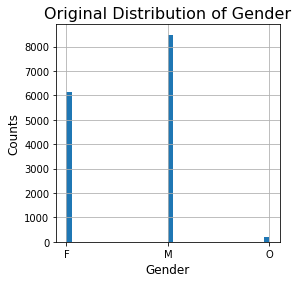

In [36]:
vars = {
    'Age': 'age',
    'Income': 'income',
    'Gender': 'gender'
}
for key, value in vars.items():
    fig, ax = plt.subplots(figsize=(4,4));
    profile[value].hist(bins=40, ax=ax);
    ax.set_title("Original Distribution of {}".format(key), fontsize=16)
    ax.set_xlabel(key, fontsize=12);
    ax.set_ylabel("Counts", fontsize=12);

In [37]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile['member_year'] = profile['became_member_on'].dt.year
profile['member_month'] = profile['became_member_on'].dt.month
profile['member_day'] = profile['became_member_on'].dt.day

In [38]:
profile.isnull().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
member_year         0
member_month        0
member_day          0
dtype: int64

In [39]:
def create_member_group(days):
    if days == 744:
        return 'since_2_year'
    elif 744 <= days <= 3*365:
        return 'since_3_year'
    elif 3*365 <= days <= 4*365:
        return 'since_3_year'
    elif 4*365 <= days <= 5*365:
        return 'since_4_year'
    elif 5*365 <= days <= 6*365:
        return 'since_5_year'
    elif 6*365 <= days <= 7*365:
        return 'since_6_year'
    elif 7*365 <= days <= 8*365:
        return 'since_7_year'
    else:
        return np.nan

In [40]:
profile['member_since_days'] = np.abs(profile['became_member_on'] - datetime.now()).dt.days.apply(create_member_group)
profile.head()

,gender,age,id,became_member_on,income,member_year,member_month,member_day,member_since_days
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,15,since_3_year
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,9,since_3_year
5,M,68.0,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4,26,since_3_year
8,M,65.0,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2,9,since_3_year
12,M,58.0,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11,11,since_3_year


In [41]:
profile['member_year'].value_counts()

2017    5599
2018    3669
2016    3024
2015    1597
2014     662
2013     274
Name: member_year, dtype: int64

(array([ 274.,    0.,  662.,    0., 1597.,    0., 3024.,    0., 5599.,
        3669.]),
 array([2013. , 2013.5, 2014. , 2014.5, 2015. , 2015.5, 2016. , 2016.5,
        2017. , 2017.5, 2018. ]),
 <a list of 10 Patch objects>)

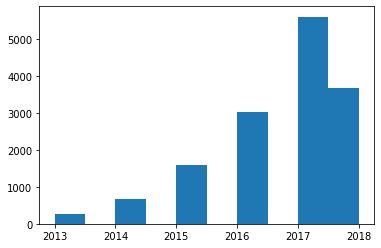

In [42]:
plt.hist(profile['member_year'])

In [44]:
profile.head()

,gender,age,id,became_member_on,income,member_year,member_month,member_day,member_since_days
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,15,since_3_year
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,9,since_3_year
5,M,68.0,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4,26,since_3_year
8,M,65.0,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2,9,since_3_year
12,M,58.0,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11,11,since_3_year
